# **Importing libraries**

In [ ]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import collections

# **Uploading datasets from public s3 link**

In [ ]:
quesdf= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding='latin-1')

In [ ]:
ansdf= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding='latin-1')

In [ ]:
tagsdf= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding='latin-1')

In [ ]:
usersdf= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding='latin-1')

# **Cleaning datasets**



In [ ]:
quesdf.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
quesdf.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ClosedDate       object
Score             int64
Title            object
Body             object
dtype: object

In [ ]:
quesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [ ]:
ansdf.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
ansdf.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ParentId          int64
Score             int64
Body             object
dtype: object

In [ ]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [ ]:
ansdf.OwnerUserId.isnull().sum()

13200

In [ ]:
ansdf.ParentId.nunique()

1102568

In [ ]:
tagsdf.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


A question can have multiple tags. Here, the Id given is that of the question so the Id in tagsdf needn't be unique

In [ ]:
tagsdf.dtypes

Id      int64
Tag    object
dtype: object

In [ ]:
tagsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
tagsdf.Tag.value_counts()

javascript          124155
java                115212
c#                  101186
php                  98808
android              90659
                     ...  
bootstrap-notify         1
netgroup                 1
tool-rec                 1
navigateuri              1
product-key              1
Name: Tag, Length: 37034, dtype: int64

In [ ]:
tagsdf.Id.nunique()

1264216

In [ ]:
DStagsdf= tagsdf[(tagsdf['Tag']=="python") | (tagsdf['Tag']=="matlab")  | (tagsdf['Tag']=="r") | (tagsdf['Tag']=="sas") | (tagsdf['Tag']=="sql")]
DStagsdf.head(10)

,Id,Tag
7,120,sql
67,1970,sql
72,2120,sql
99,2840,sql
130,4110,sql
184,6340,sql
266,10190,sql
312,11060,python
392,13540,sql
503,17250,python


In [ ]:
'''tagsdf['Id'] = tagsdf.round(0).astype(str)
tagsdf['Tag'] = tagsdf['Tag'].astype(str)

tagsGrouped = tagsdf.groupby(['Id'])['Tag'].apply(','.join).reset_index()''' #Grouping tags according to Id

"tagsdf['Id'] = tagsdf.round(0).astype(str)\ntagsdf['Tag'] = tagsdf['Tag'].astype(str)\n\ntagsGrouped = tagsdf.groupby(['Id'])['Tag'].apply(','.join).reset_index()"

In [ ]:
tagsGrouped

,Id,Tag
0,1000000,"vb6,progress-bar"
1,10000020,"jquery,google-apps-script"
2,10000030,"ios,mkmapview,mkannotationview"
3,10000120,"ios,uikit,interface-builder"
4,10000150,r
...,...,...
1264211,9999910,inno-setup
1264212,9999930,"html,actionscript-3,mouseevent,flash-cs5"
1264213,9999940,"jquery,jquery-ui"
1264214,9999950,"asp.net,signalr"


In [ ]:
usersdf.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
usersdf.dtypes

Unnamed: 0           int64
id                   int64
display_name        object
creation_date       object
last_access_date    object
reputation           int64
up_votes             int64
down_votes           int64
views                int64
dtype: object

In [ ]:
usersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


### Standardising and Changing to appropriate data types

In [ ]:
quesdf.CreationDate= quesdf.CreationDate.apply(lambda x: str(x).split('+')[0])

In [ ]:
quesdf['CreationDate']= pd.to_datetime(quesdf['CreationDate'])

In [ ]:
quesdf['ClosedDate']= pd.to_datetime(quesdf['ClosedDate'])

In [ ]:
quesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1264216 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1264216 non-null  datetime64[ns, UTC]
 3   ClosedDate    55959 non-null    datetime64[ns, UTC]
 4   Score         1264216 non-null  int64              
 5   Title         1264216 non-null  object             
 6   Body          1264216 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(2)
memory usage: 67.5+ MB


In [ ]:
ansdf.CreationDate= ansdf.CreationDate.apply(lambda x: str(x).split('+')[0])

In [ ]:
ansdf['CreationDate']= pd.to_datetime(ansdf['CreationDate'])

In [ ]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   float64            
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 92.2+ MB


In [ ]:
usersdf.creation_date= usersdf.creation_date.apply(lambda x: x.split('+')[0])

In [ ]:
usersdf['creation_date']=pd.to_datetime(usersdf['creation_date'])

In [ ]:
usersdf.last_access_date= usersdf.last_access_date.apply(lambda x: str(x).split('+')[0])


In [ ]:
usersdf['last_access_date']= pd.to_datetime(usersdf['last_access_date'])

In [ ]:
usersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype              
---  ------            -----              
 0   Unnamed: 0        int64              
 1   id                int64              
 2   display_name      object             
 3   creation_date     datetime64[ns, UTC]
 4   last_access_date  datetime64[ns, UTC]
 5   reputation        int64              
 6   up_votes          int64              
 7   down_votes        int64              
 8   views             int64              
dtypes: datetime64[ns, UTC](2), int64(6), object(1)
memory usage: 136.7+ MB


In [ ]:
usersdf.drop_duplicates(inplace= True)

In [ ]:
usersdf.shape

(1990480, 9)

In [ ]:
usersdf.id.unique

<bound method Series.unique of 0               26
1               26
2               26
3               26
4               26
            ...   
1990475    4228492
1990476    6820506
1990477    4464432
1990478    4605946
1990479    6107989
Name: id, Length: 1990480, dtype: int64>

### Handling the null values 

In [ ]:
quesdf.OwnerUserId.isnull().sum()

14454

In [ ]:
quesdf= quesdf[~quesdf['OwnerUserId'].isnull()]

In [ ]:
quesdf.OwnerUserId.isnull().sum()

0

In [ ]:
quesdf.ClosedDate.isnull().sum()

1194522

In [ ]:
quesdf['ClosedDate'].notnull().sum()

55240

In [ ]:
quesdf[quesdf.ClosedDate.notnull()]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
1,90,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
6,470,71.0,2008-08-02 15:11:47+00:00,2016-03-26 05:23:29+00:00,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
27,2540,136.0,2008-08-05 16:30:37+00:00,2014-04-03 15:36:28+00:00,39,Good STL-like library for C,<p>What are good libraries for C with datastru...
29,2630,17.0,2008-08-05 18:01:32+00:00,2012-02-22 01:58:23+00:00,14,What are your favorite Powershell Cmdlets?,<p>I just found /n softwares free Powershell N...
35,2970,58.0,2008-08-05 23:55:25+00:00,2012-03-06 03:17:01+00:00,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...
...,...,...,...,...,...,...,...
1264148,40141810,7044612.0,2016-10-19 21:29:05+00:00,2016-10-19 21:41:54+00:00,-1,Windows - Where can I find a system() list of ...,<p>This is my first question here in StackOver...
1264177,40142370,7044756.0,2016-10-19 22:12:46+00:00,2016-10-19 22:17:45+00:00,-6,How can i find value of first zero in base 2,<p>I'm tried to write a program to find value ...
1264180,40142450,6247467.0,2016-10-19 22:19:45+00:00,2016-10-19 23:06:30+00:00,-1,C# thread report found items,<p>Lets say I want to make a program that find...
1264187,40142600,7044841.0,2016-10-19 22:33:00+00:00,2016-10-19 22:34:48+00:00,-10,Remove white spaces without replace(),<pre><code>def compress(s):\n âââ(str...


Closed Date column is the date when the question is closed due to duplicacy or other reasons. Closed questions cannot be answered so we will not be dealing with this column in our data analysis. According to the above analysis, 55240 questions cannot be answered because they are closed.

In [ ]:
quesdf.drop(['ClosedDate'], axis=1)

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19 23:38:01+00:00,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19 23:48:09+00:00,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19 23:52:50+00:00,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19 23:55:24+00:00,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [ ]:
quesdf= quesdf.drop(['ClosedDate'], axis=1)

Closed Date is irrelevant to our analysis so I dropped it.

In [ ]:
ansdf.drop(['Id'], axis=1, inplace=True)

Answer Id is irrelevant to analysis so it is dropped

In [ ]:
ansdf= ansdf[~ansdf['OwnerUserId'].isnull()]

In [ ]:
ansdf.OwnerUserId.isnull().sum()

0

In [ ]:
quesdf['OwnerUserId']= quesdf['OwnerUserId'].astype('int32')

In [ ]:
ansdf['OwnerUserId']= ansdf['OwnerUserId'].astype('int32')

In [ ]:
usersdf.drop(['Unnamed: 0'], axis=1)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283000+00:00,2019-08-28 18:01:29.560000+00:00,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.830000+00:00,2018-07-20 01:28:24.853000+00:00,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523000+00:00,2019-08-31 13:51:47.413000+00:00,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.630000+00:00,2019-07-13 23:55:47.607000+00:00,884,53,1,191


In [ ]:
usersdf= usersdf.drop(['Unnamed: 0'], axis=1)

In [ ]:
usersdf.drop(['creation_date','last_access_date'], axis=1, inplace=True)

In [ ]:
usersdf.drop_duplicates(inplace= True)
usersdf.shape

(465460, 6)

In [ ]:
usersdf.head()

,id,display_name,reputation,up_votes,down_votes,views
0,26,Shawn,11820,565,67,3547
27,1109,Theo,116072,457,136,6905
85,364174,stats,325,25,1,60
87,61,Bernard,22779,1321,219,1731
97,20709,Black Horus,978,73,2,96


In [ ]:
ansdf.head()

,OwnerUserId,CreationDate,ParentId,Score,Body
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
ansdf.rename(columns= {'CreationDate': 'AnswerDate', 'Body':'Answer','Score':'AnswerScore', 'ParentId':'QuesId'}, inplace=True)

In [ ]:
ansdf.head(10)

,OwnerUserId,AnswerDate,QuesId,AnswerScore,Answer
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."
5,59,2008-08-02 03:00:24+00:00,330,19,<p>I would be a bit reluctant to use nested cl...
6,100,2008-08-02 04:18:15+00:00,260,6,<p>You might be able to use IronRuby for that....
7,119,2008-08-02 06:16:23+00:00,260,5,"<P>You could use any of the DLR languages, whi..."
8,49,2008-08-02 15:33:13+00:00,470,8,"<p>No, what you're doing is fine. Don't let th..."
9,86,2008-08-02 18:16:07+00:00,180,3,<p>Isn't it also a factor which order you set ...


In [ ]:
usersdf.rename(columns= {'id':'OwnerUserId'}, inplace=True)
usersdf.head()

,OwnerUserId,display_name,reputation,up_votes,down_votes,views
0,26,Shawn,11820,565,67,3547
27,1109,Theo,116072,457,136,6905
85,364174,stats,325,25,1,60
87,61,Bernard,22779,1321,219,1731
97,20709,Black Horus,978,73,2,96


### Standardising columns/rows

In [ ]:
quesdf.Score.describe()

count    1.249762e+06
mean     1.770194e+00
std      1.365188e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.190000e+03
Name: Score, dtype: float64

In [ ]:
quesdf.Score= quesdf.Score.astype("int64")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


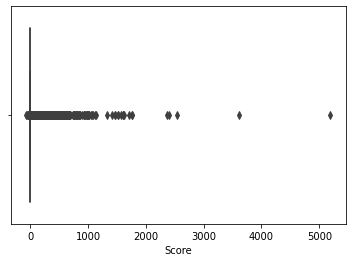

In [ ]:
sns.boxplot(quesdf.Score)
plt.show()

As we can see, maximum values lie between 0 to 1200

# EDA

In [ ]:
quesdf.Score.quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50       0.0
0.70       1.0
0.80       2.0
0.90       3.0
0.95       6.0
0.99      22.0
1.00    5190.0
Name: Score, dtype: float64

As we can see, outliers are present but shouldn't be removed. They need to be binned or capped.

In [ ]:
quesdf[quesdf['Score']>0].Score.describe()

count    585976.000000
mean          4.024475
std          19.679127
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max        5190.000000
Name: Score, dtype: float64

In [ ]:
quesdf[quesdf['Score']>22].Score.describe()

count    12289.000000
mean        67.773456
std        117.900893
min         23.000000
25%         28.000000
50%         39.000000
75%         66.000000
max       5190.000000
Name: Score, dtype: float64

In [ ]:
quesdf.Score.count()

1249762

In [ ]:
quesdf[(quesdf['Score']>0) & (quesdf['Score']<2000)].Score.describe()

count    585971.000000
mean          3.997031
std          16.997386
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max        1760.000000
Name: Score, dtype: float64

In [ ]:
quesdf[quesdf['Score']>2000].Score.describe()

count       5.000000
mean     3220.400000
std      1215.558226
min      2363.000000
25%      2399.000000
50%      2537.000000
75%      3613.000000
max      5190.000000
Name: Score, dtype: float64

In [ ]:
quesdf[quesdf['Score']>2000]

,Id,OwnerUserId,CreationDate,Score,Title,Body
441,40480,4315,2008-09-02 20:14:29+00:00,3613,"Is Java ""pass-by-reference"" or ""pass-by-value""?",<p>I always thought Java was <strong>pass-by-r...
4907,348170,14069,2008-12-07 21:57:46+00:00,5190,How to undo 'git add' before commit?,<p>I mistakenly added files using the command:...
5859,406230,36830,2009-01-02 07:30:16+00:00,2537,Regular expression to match line that doesn't ...,<p>I know it's possible to match a word and th...
7771,520650,825,2009-02-06 15:14:04+00:00,2399,Make an existing Git branch track a remote bra...,<p>I know how to make a new branch that tracks...
57759,2669690,151495,2010-04-19 18:00:09+00:00,2363,Why does Google prepend while(1); to their JSO...,<p>Why does Google prepend <code>while(1);</co...


In [ ]:
quesdf['bin'] = pd.cut(quesdf['Score'], bins=[-73,0,22,5190], labels=["Poor", "Average", "Good"])

In [ ]:
quesdf.bin.value_counts()

Poor       663785
Average    573687
Good        12289
Name: bin, dtype: int64

In [ ]:
quesdf.bin.value_counts(normalize=True)

Poor       0.531130
Average    0.459037
Good       0.009833
Name: bin, dtype: float64

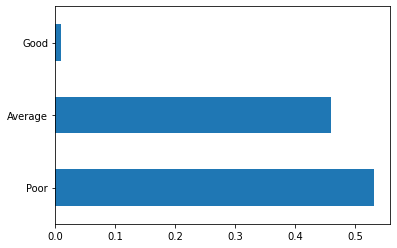

In [ ]:
quesdf.bin.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 5 columns):
 #   Column       Dtype              
---  ------       -----              
 0   OwnerUserId  int32              
 1   AnswerDate   datetime64[ns, UTC]
 2   QuesId       int64              
 3   AnswerScore  int64              
 4   Answer       object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(1)
memory usage: 84.0+ MB


In [ ]:
quesdf.Score.value_counts()

 0       585537
 1       277534
 2       123270
 3        60314
-1        43636
          ...  
 432          1
 435          1
 1460         1
 261          1
 1023         1
Name: Score, Length: 529, dtype: int64

In [ ]:
ansdf.head()

,OwnerUserId,AnswerDate,QuesId,AnswerScore,Answer
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
ansdf.AnswerScore.describe()

count    2.001316e+06
mean     2.479975e+00
std      1.592961e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: AnswerScore, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


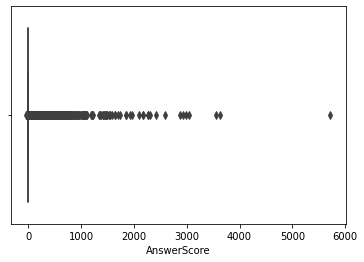

In [ ]:
sns.boxplot(ansdf.AnswerScore)
plt.show()

In [ ]:
ansdf.AnswerScore.quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50       1.0
0.70       2.0
0.80       3.0
0.90       4.0
0.95       8.0
0.99      28.0
1.00    5718.0
Name: AnswerScore, dtype: float64

In [ ]:
ansdf[ansdf['AnswerScore']<2000].AnswerScore.describe()

count    2.001301e+06
mean     2.458493e+00
std      1.364353e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.963000e+03
Name: AnswerScore, dtype: float64

In [ ]:
ansdf[ansdf['AnswerScore']>3000].AnswerScore.describe()

count       4.000000
mean     3985.500000
std      1184.806173
min      3038.000000
25%      3421.250000
50%      3593.000000
75%      4157.250000
max      5718.000000
Name: AnswerScore, dtype: float64

So we can see that maximum scores lie between the range of 0 to 2000

In [ ]:
ansdf.AnswerScore.value_counts()

0       771984
1       526071
2       258565
3       134389
4        76165
         ...  
569          1
571          1
572          1
573          1
1015         1
Name: AnswerScore, Length: 695, dtype: int64

In [ ]:
usersdf.head()

,OwnerUserId,display_name,reputation,up_votes,down_votes,views
0,26,Shawn,11820,565,67,3547
27,1109,Theo,116072,457,136,6905
85,364174,stats,325,25,1,60
87,61,Bernard,22779,1321,219,1731
97,20709,Black Horus,978,73,2,96


In [ ]:
ansdf.head()

,OwnerUserId,AnswerDate,QuesId,AnswerScore,Answer
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
quesdf.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,bin
0,80,26,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good
1,90,58,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good
2,120,83,2008-08-01 15:50:08+00:00,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average
3,180,2089740,2008-08-01 18:42:19+00:00,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,Good
4,260,91,2008-08-01 23:22:08+00:00,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,Good


In [ ]:
usersdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   OwnerUserId   465460 non-null  int64 
 1   display_name  465436 non-null  object
 2   reputation    465460 non-null  int64 
 3   up_votes      465460 non-null  int64 
 4   down_votes    465460 non-null  int64 
 5   views         465460 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.9+ MB


In [ ]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 5 columns):
 #   Column       Dtype              
---  ------       -----              
 0   OwnerUserId  int32              
 1   AnswerDate   datetime64[ns, UTC]
 2   QuesId       int64              
 3   AnswerScore  int64              
 4   Answer       object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(1)
memory usage: 84.0+ MB


In [ ]:
quesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  int32              
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   Score         1249762 non-null  int64              
 4   Title         1249762 non-null  object             
 5   Body          1249762 non-null  object             
 6   bin           1249761 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(2), object(2)
memory usage: 63.2+ MB


## Most popular Data Science tag

In [ ]:
DStagsdf.Tag.value_counts()

python    64601
sql       35782
r         15701
matlab     6495
sas         697
Name: Tag, dtype: int64

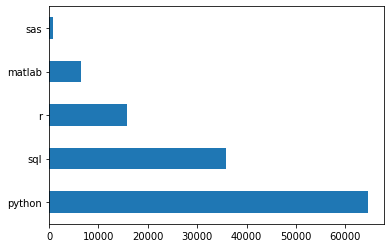

In [ ]:
DStagsdf.Tag.value_counts().plot.barh()

##Combining question dataframe with tags dataframe

In [ ]:
questag= pd.merge(quesdf, tagsdf, how='outer',on='Id')
questag.head(10)

,Id,OwnerUserId,CreationDate,Score,Title,Body,bin,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex
1,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3
2,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,air
3,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,svn
4,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,tortoisesvn
5,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,branch
6,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,branching-and-merging
7,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sql
8,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,asp.net
9,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sitemap


In [ ]:
quesdf.shape

In [ ]:
quesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  int32              
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   Score         1249762 non-null  int64              
 4   Title         1249762 non-null  object             
 5   Body          1249762 non-null  object             
 6   bin           1249761 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(2), object(2)
memory usage: 63.2+ MB


In [ ]:
tagsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
questag.shape

(3750994, 8)

### Most popular tags

In [ ]:
tagsdf.Tag.value_counts()

javascript          124155
java                115212
c#                  101186
php                  98808
android              90659
                     ...  
bootstrap-notify         1
netgroup                 1
tool-rec                 1
navigateuri              1
product-key              1
Name: Tag, Length: 37034, dtype: int64

In [ ]:
tagsdf.Tag.nunique()

37034

In [ ]:
tagsdf.Tag.value_counts()

javascript          124155
java                115212
c#                  101186
php                  98808
android              90659
                     ...  
bootstrap-notify         1
netgroup                 1
tool-rec                 1
navigateuri              1
product-key              1
Name: Tag, Length: 37034, dtype: int64

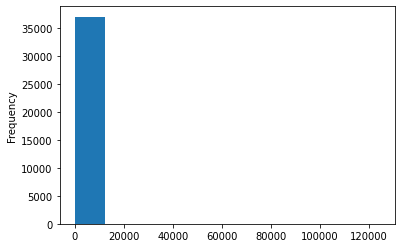

In [ ]:
tagsdf.Tag.value_counts().plot.hist()

In [ ]:
quesdf.Id.count()

1249762

In [ ]:
ansdf.QuesId.nunique()

1099938

In [ ]:
quesdf.shape

(1249762, 7)

In [ ]:
ansdf.shape

(2001316, 5)

## Question with highest score

In [ ]:
questag[questag.Score==questag.Score.max()]

,Id,OwnerUserId,CreationDate,Score,Title,Body,bin,Tag
13109,348170,14069.0,2008-12-07 21:57:46+00:00,5190.0,How to undo 'git add' before commit?,<p>I mistakenly added files using the command:...,Good,git
13110,348170,14069.0,2008-12-07 21:57:46+00:00,5190.0,How to undo 'git add' before commit?,<p>I mistakenly added files using the command:...,Good,version-control
13111,348170,14069.0,2008-12-07 21:57:46+00:00,5190.0,How to undo 'git add' before commit?,<p>I mistakenly added files using the command:...,Good,git-stage


In [ ]:
top_ques = list(zip(questag['Id'],questag['Score'],questag['Title']))
top_ques.sort(key=lambda x: x[1], reverse= True)
for i,s,t in top_ques[:5]:
  print("Question id:", i) 
  print("Score :", s)
  print("Title :", t, '\n')

Question id: 348170
Score : 5190.0
Title : How to undo 'git add' before commit? 

Question id: 348170
Score : 5190.0
Title : How to undo 'git add' before commit? 

Question id: 348170
Score : 5190.0
Title : How to undo 'git add' before commit? 

Question id: 40480
Score : 3613.0
Title : Is Java "pass-by-reference" or "pass-by-value"? 

Question id: 40480
Score : 3613.0
Title : Is Java "pass-by-reference" or "pass-by-value"? 



In [ ]:
ansdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001316 entries, 0 to 2014515
Data columns (total 5 columns):
 #   Column       Dtype              
---  ------       -----              
 0   OwnerUserId  int32              
 1   AnswerDate   datetime64[ns, UTC]
 2   QuesId       int64              
 3   AnswerScore  int64              
 4   Answer       object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(1)
memory usage: 84.0+ MB


In [ ]:
ansdf.shape

(2001316, 5)

## Combining Answers dataframe with users dataframe

In [ ]:
userans= pd.merge(ansdf,usersdf,how='inner',on='OwnerUserId')
userans.head(10)

,OwnerUserId,AnswerDate,QuesId,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",Bernard,22779,1321,219,1731
1,61,2008-08-29 01:30:38+00:00,24270,1,<p>I know I find OOP useful pretty much solely...,Bernard,22779,1321,219,1731
2,61,2008-09-07 02:32:02+00:00,47980,7,<p>I sure as hell can't. Small errors explode ...,Bernard,22779,1321,219,1731
3,61,2008-09-09 08:35:20+00:00,51390,2,<p>I wonder how widespread the JVM actually is...,Bernard,22779,1321,219,1731
4,61,2008-09-26 22:57:06+00:00,142340,0,<p>I just have a number. First release is <cod...,Bernard,22779,1321,219,1731
5,61,2009-02-08 23:41:04+00:00,526660,3,<p>You need a main function:</p>\n\n<pre><code...,Bernard,22779,1321,219,1731
6,61,2009-11-23 10:24:47+00:00,1581560,0,"<p>The answer, it seems, is to use <a href=""ht...",Bernard,22779,1321,219,1731
7,61,2010-03-25 23:53:31+00:00,2520220,8,"<p>Yes, the function must be declared as <code...",Bernard,22779,1321,219,1731
8,61,2011-06-05 11:28:08+00:00,6242540,8,"<p>If you merely want a pointer, the correct w...",Bernard,22779,1321,219,1731
9,61,2011-07-02 12:03:26+00:00,6553950,7,"<p>I asked around on IRC, and as far as we can...",Bernard,22779,1321,219,1731


In [ ]:
userans.shape

(1990480, 10)

In [ ]:
usersdf.shape

(465460, 6)

In [ ]:
ansdf.shape

(2001316, 5)

In [ ]:
userans.rename(columns= {'OwnerUserId':'A_OwnerUserId'}, inplace= True)

In [ ]:
userans.drop_duplicates(inplace= True)

In [ ]:
userans.head(20)

,A_OwnerUserId,AnswerDate,QuesId,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views
0,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",Bernard,22779,1321,219,1731
1,61,2008-08-29 01:30:38+00:00,24270,1,<p>I know I find OOP useful pretty much solely...,Bernard,22779,1321,219,1731
2,61,2008-09-07 02:32:02+00:00,47980,7,<p>I sure as hell can't. Small errors explode ...,Bernard,22779,1321,219,1731
3,61,2008-09-09 08:35:20+00:00,51390,2,<p>I wonder how widespread the JVM actually is...,Bernard,22779,1321,219,1731
4,61,2008-09-26 22:57:06+00:00,142340,0,<p>I just have a number. First release is <cod...,Bernard,22779,1321,219,1731
5,61,2009-02-08 23:41:04+00:00,526660,3,<p>You need a main function:</p>\n\n<pre><code...,Bernard,22779,1321,219,1731
6,61,2009-11-23 10:24:47+00:00,1581560,0,"<p>The answer, it seems, is to use <a href=""ht...",Bernard,22779,1321,219,1731
7,61,2010-03-25 23:53:31+00:00,2520220,8,"<p>Yes, the function must be declared as <code...",Bernard,22779,1321,219,1731
8,61,2011-06-05 11:28:08+00:00,6242540,8,"<p>If you merely want a pointer, the correct w...",Bernard,22779,1321,219,1731
9,61,2011-07-02 12:03:26+00:00,6553950,7,"<p>I asked around on IRC, and as far as we can...",Bernard,22779,1321,219,1731


## Combining all the 4 dataframes- questions, tags, answers and users

In [ ]:
questag.head(10)

,Id,OwnerUserId,CreationDate,Score,Title,Body,bin,Tag
0,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex
1,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3
2,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,air
3,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,svn
4,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,tortoisesvn
5,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,branch
6,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,branching-and-merging
7,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sql
8,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,asp.net
9,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sitemap


In [ ]:
questag.rename(columns= {'Id':'QuesId','Body':'Question'}, inplace=True)

In [ ]:
questag.rename(columns= {'OwnerUserId':'Q_OwnerUserId'}, inplace=True)

In [ ]:
len(questag.QuesId)

3750994

In [ ]:
len(userans.QuesId)

1990480

In [ ]:
Stack= pd.merge(questag, userans, how='inner',on='QuesId')

In [ ]:
Stack.shape

(5827037, 17)

In [ ]:
Stack.head()

,QuesId,Q_OwnerUserId,CreationDate,Score,Title,Question,bin,Tag,A_OwnerUserId,AnswerDate,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547
1,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905
2,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,364174,2010-09-22 15:37:30+00:00,1,<p>What about making your delimiter something ...,stats,325,25,1,60
3,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547
4,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905


In [ ]:
Stack.AnswerScore.describe()

count    5.827037e+06
mean     2.489158e+00
std      1.610304e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: AnswerScore, dtype: float64

In [ ]:
Stack.Score.describe()

count    5.743352e+06
mean     5.794480e+00
std      4.977437e+01
min     -7.300000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.190000e+03
Name: Score, dtype: float64

In [ ]:
Stack.drop_duplicates(inplace= True)
Stack.head(10)

,QuesId,Q_OwnerUserId,CreationDate,Score,Title,Question,bin,Tag,A_OwnerUserId,AnswerDate,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views
0,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547
1,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905
2,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,364174,2010-09-22 15:37:30+00:00,1,<p>What about making your delimiter something ...,stats,325,25,1,60
3,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547
4,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905
5,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,364174,2010-09-22 15:37:30+00:00,1,<p>What about making your delimiter something ...,stats,325,25,1,60
6,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,air,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547
7,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,air,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905
8,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,air,364174,2010-09-22 15:37:30+00:00,1,<p>What about making your delimiter something ...,stats,325,25,1,60
9,90,58.0,2008-08-01 14:41:24+00:00,144.0,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good,svn,61,2008-08-01 14:45:37+00:00,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",Bernard,22779,1321,219,1731


## Calculating the expected time to get a question answered

In [ ]:
Stack['Expected time']= Stack.AnswerDate-Stack.CreationDate

In [ ]:
Stack.head()

,QuesId,Q_OwnerUserId,CreationDate,Score,Title,Question,bin,Tag,A_OwnerUserId,AnswerDate,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views,Expected time
0,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547,0 days 02:12:40
1,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905,12 days 02:12:02
2,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,flex,364174,2010-09-22 15:37:30+00:00,1,<p>What about making your delimiter something ...,stats,325,25,1,60,782 days 01:40:23
3,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,26,2008-08-01 16:09:47+00:00,12,<p>I wound up using this. It is a kind of a ha...,Shawn,11820,565,67,3547,0 days 02:12:40
4,80,26.0,2008-08-01 13:57:07+00:00,26.0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Good,actionscript-3,1109,2008-08-13 16:09:09+00:00,6,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",Theo,116072,457,136,6905,12 days 02:12:02


In [1]:
# To avoid any repition of tags, let us consider the minimum time required to answer any particular answer
stack1 = Stack.loc[Stack.groupby(["QuesId"])["Expected time"].min()]

NameError: ignored

In [ ]:
'''# Extract the Creation date from CreationDate_x column.
Stack['CreationDate']= Stack['CreationDate'].apply(lambda x: x.split("T")[0])

# Extract the Creation date from CreationDate_y column.
Stack['AnswerDate']= inp0['AnswerDate'].apply(lambda x: x.split("T")[0])

# Convert the Creation date column into date type.
Stack['CreationDate'] = pd.to_datetime(inp0['CreationDate'])
Stack['AnswerDate'] = pd.to_datetime(inp0['AnswerDate'])'''

'# Extract the Creation date from CreationDate_x column.\nStack[\'CreationDate\']= Stack[\'CreationDate\'].apply(lambda x: x.split("T")[0])\n\n# Extract the Creation date from CreationDate_y column.\nStack[\'AnswerDate\']= inp0[\'AnswerDate\'].apply(lambda x: x.split("T")[0])\n\n# Convert the Creation date column into date type.\nStack[\'CreationDate\'] = pd.to_datetime(inp0[\'CreationDate\'])\nStack[\'AnswerDate\'] = pd.to_datetime(inp0[\'AnswerDate\'])'

In [ ]:
tagsdf.rename(columns={'Id':'QuesId'}, inplace=True)

In [ ]:
DStagsdf.head(10)

,QuesId,Tag
7,120,sql
67,1970,sql
72,2120,sql
99,2840,sql
130,4110,sql
184,6340,sql
266,10190,sql
312,11060,python
392,13540,sql
503,17250,python


In [ ]:
DStagsdf.rename(columns= {'Id':'QuesId'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
DSStack= pd.merge(Stack, DStagsdf, how='inner', on='QuesId')
DSStack.head(10)

,QuesId,Q_OwnerUserId,CreationDate,Score,Title,Question,bin,Tag_x,A_OwnerUserId,AnswerDate,AnswerScore,Answer,display_name,reputation,up_votes,down_votes,views,Expected time,Tag_y
0,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sql,12734,2008-09-23 22:41:11+00:00,9,<p>The Jeff Prosise version from MSDN magazine...,Kelly Adams,695,35,0,105,53 days 06:51:03,sql
1,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,asp.net,12734,2008-09-23 22:41:11+00:00,9,<p>The Jeff Prosise version from MSDN magazine...,Kelly Adams,695,35,0,105,53 days 06:51:03,sql
2,120,83.0,2008-08-01 15:50:08+00:00,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Average,sitemap,12734,2008-09-23 22:41:11+00:00,9,<p>The Jeff Prosise version from MSDN magazine...,Kelly Adams,695,35,0,105,53 days 06:51:03,sql
3,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,269,2008-08-05 06:43:30+00:00,3,<p>When I wrote my first trigger it was in Per...,sparkes,14710,330,37,549,0 days 00:03:59,sql
4,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,277,2008-08-06 14:26:08+00:00,5,"<p>I have only really used PL/pgSQL, but that ...",kaybenleroll,7980,878,5,534,1 days 07:46:37,sql
5,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,1081,2008-09-12 15:39:39+00:00,2,<p>Skype uses <strong>PostgreSQL</strong> toge...,dpavlin,837,125,12,221,38 days 09:00:08,sql
6,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,11116,2008-09-16 05:43:22+00:00,4,"<p>I write pretty much everything in plpgsql, ...",decibel,361,3,0,34,41 days 23:03:51,sql
7,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,13860,2008-09-16 22:00:49+00:00,2,<p>For anything really small/simple or that do...,Flimzy,44463,2200,6081,9183,42 days 15:21:18,sql
8,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,1167846,2008-09-18 14:54:22+00:00,2,<p>PL/Ruby because I use Ruby every day anyway...,Tony Pitale,837,116,10,138,44 days 08:14:51,sql
9,1970,116.0,2008-08-05 06:39:31+00:00,10.0,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,Average,sql,49166,2009-09-05 04:01:09+00:00,2,<p>I use PL/Perl because:</p>\n\n<ul>\n<li>I l...,porkbird,51,0,0,16,395 days 21:21:38,sql


# RDS Connection

In [ ]:
!pip3 install boto3

In [ ]:
!pip3 install mysql-connector --user

In [ ]:
import boto3

client = boto3.client('rds')

In [ ]:
import mysql.connector

dbstack= mysql.connector.connect(
    host= 'dbstackoverflow.cghrzblxzfuz.us-east-1.rds.amazonaws.com',
    user= 'admin'
    passwd= 'Balthazar123',
    port= 3306,
    db= 'dbstackoverflow'

)